# Random variables

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.stats as sts

In [2]:
# Make a roll 2 dice simulator (20,000 rolls)

# Dices
dice_1 = [random.randrange(7) for x in range(20000)]
dice_2 = [random.randrange(7) for x in range(20000)]
# dice_1 = np.random.random_integers(1, 6, 20000)
# dice_1 = np.random.random_integers(1, 6, 20000)

In [3]:
# Check the probability of numbers for dice

def prob_dice_number(dice, number):
    '''
    dice -> list of random integers
    number -> result will ve probability of number roll
    '''
    number_quantity = dice.count(number)
    all_numbers = len(dice)
    return number_quantity/all_numbers
    
[print('number:', i + 1, 'probability:', (prob_dice_number(dice_1, i), prob_dice_number(dice_2, i))) for i in range(6)];

number: 1 probability: (0.14305, 0.141)
number: 2 probability: (0.1431, 0.14795)
number: 3 probability: (0.1455, 0.13735)
number: 4 probability: (0.146, 0.1435)
number: 5 probability: (0.1388, 0.14465)
number: 6 probability: (0.14135, 0.13815)


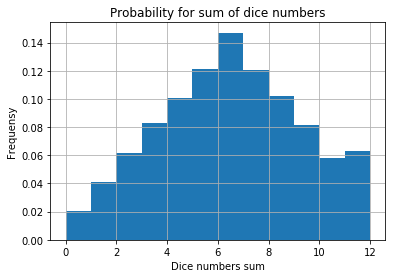

In [4]:
# Build a histogram of the loss of sums of numbers on the dices

# Sum for the diceis
dices_sum = [sum(elements) for _, elements in enumerate(zip(dice_1,dice_2))];

# Histogram
fig, axs = plt.subplots()
axs.grid(True)

plt.hist(dices_sum, bins = 12, density=True);

plt.title('Probability for sum of dice numbers');
plt.ylabel('Frequensy');
plt.xlabel('Dice numbers sum');

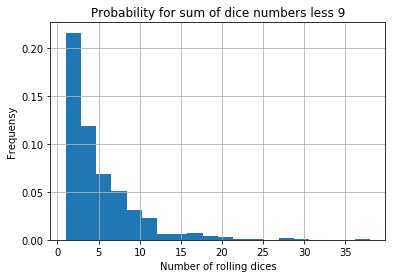

In [5]:
# Make 10,000 series of rolls. In each series, determine the number of rolls before the amount falls 9 on the dices

def get_dices():
    '''generating sum two dices for long rolling series'''
    for _ in range(10000):
        dices = random.randrange(7) + random.randrange(7)
        yield(dices)

def stop_dices(sum_dices):
    '''stop iterating'''
    if sum_dices >= 9:
        raise StopIteration
    return sum_dices

rolling_lenght = [len( list( map(stop_dices,get_dices()) ) ) + 1 for _ in range(1000)]

# Visualize the result

fig, axs = plt.subplots()
axs.grid(True)

plt.hist(rolling_lenght, bins = 20, density=True);

plt.title('Probability for sum of dice numbers less 9');
plt.ylabel('Frequensy');
plt.xlabel('Number of rolling dices');

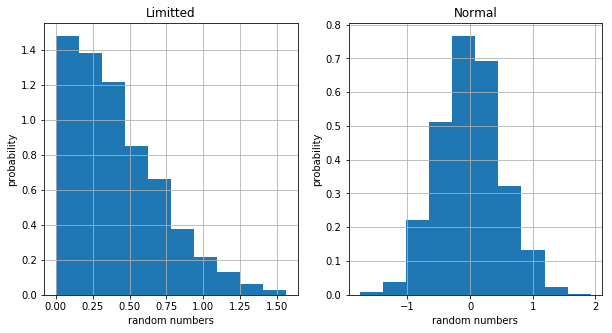

In [6]:
# Generate a sequence of random numbers in the range from 0 to 12, with a normal distribution
low_limit, high_limit = 0, 12
mu, sigma = 0, 0.5

# Limitted Normal and Normal distributions
# a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
limited_normal = sts.truncnorm((low_limit - mu) / sigma, (high_limit - mu) / sigma, loc=mu, scale=sigma)
normal = sts.norm(mu, sigma)

# Visualize the result
distributions = (limited_normal, normal)
distributions_signs = ('Limitted','Normal')

fig, axs = plt.subplots(1,2,figsize=(10, 5))

for idx, (sign, data) in enumerate(zip(distributions_signs,distributions)):
    axs[idx].hist(data.rvs(1000), bins = 10, density=True)
    axs[idx].grid(True)
    axs[idx].set_xlabel('random numbers')
    axs[idx].set_ylabel('probability')
    axs[idx].set_title(sign)

plt.show()

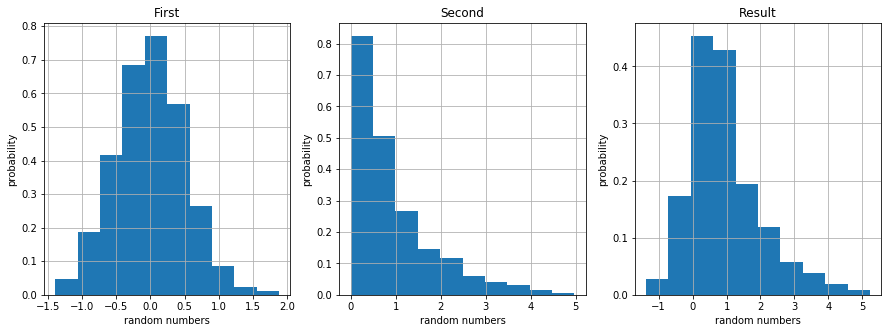

In [7]:
# Generate 2 random sequences. Get the third out of them each element of which is 
# the sum of the corresponding elements of the first two sequences

# Random sequences
first = np.random.normal(0, .5, 1000)
second = np.random.exponential(1, 1000)
# Result
third = list(map(lambda x: sum(x), zip(first,second)))

# Visualize the result

sequences = (first, second, third)
sequences_signs = ('First','Second','Result')

fig, axs = plt.subplots(1,3,figsize=(15, 5))

for idx, (sign, data) in enumerate(zip(sequences_signs,sequences)):
    axs[idx].hist(data, bins = 10, density=True)
    axs[idx].grid(True)
    axs[idx].set_xlabel('random numbers')
    axs[idx].set_ylabel('probability')
    axs[idx].set_title(sign)

plt.show()

Test 1: Its not normal distribution
Test 2: Its not normal distribution
Test 3: Its not normal distribution


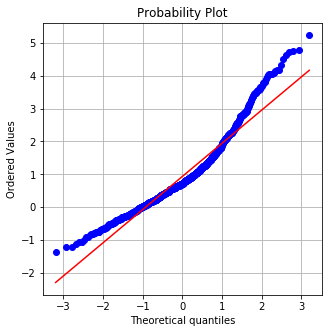

In [8]:
# Check result if the obtained distribution is normal

# Test 1
test_z, test_pval = sts.mstats.normaltest(third)
# link to limit 0.05 http://mathforum.org/library/drmath/view/72065.html
if(test_pval < 0.05):
    print("Test 1: Its not normal distribution")
else: print("Test 2: Its Normal like")
    
# Test 2
test_z_2, test_pval_2 = sts.shapiro(third)
if(test_pval_2 < 0.05):
    print("Test 2: Its not normal distribution")
else: print("Test 2: Its Normal like")

# Test 3
if( (sts.skew(third) and sts.kurtosis(third)) > 0.05):
    print("Test 3: Its not normal distribution")

# QQ plot
fig, axs = plt.subplots(1,figsize=(5, 5))
axs.grid(True)
sts.probplot(third, plot=plt);

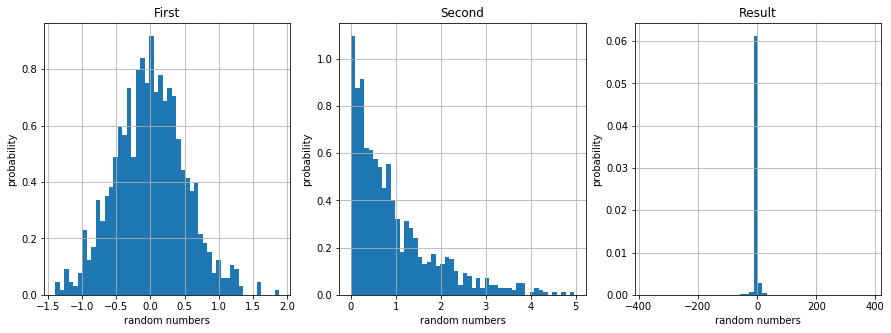

In [9]:
# From the two previous sequences get the fourth, each element of which is equal to the ratio of the corresponding
# elements from the first sequence to the element of the second sequence

# Result
fours = list(map(lambda x: x[0]/x[1], zip(first,second)))

# Visualize the result

sequences = (first, second, fours)
sequences_signs = ('First','Second','Result')

fig, axs = plt.subplots(1,3,figsize=(15, 5))

for idx, (sign, data) in enumerate(zip(sequences_signs,sequences)):
    axs[idx].hist(data, bins = 50, density=True)
    axs[idx].grid(True)
    axs[idx].set_xlabel('random numbers')
    axs[idx].set_ylabel('probability')
    axs[idx].set_title(sign)

plt.show()

Test 1: Its not normal distribution
Test 2: Its not normal distribution
Test 3: Its not normal distribution


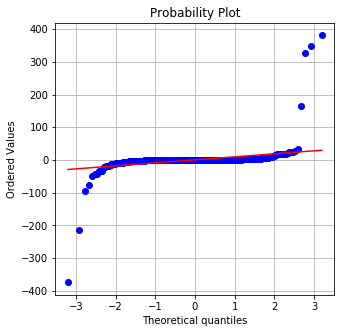

In [10]:
# Check result if the obtained distribution is normal

# Test 1
test_z, test_pval = sts.mstats.normaltest(fours)
# link to limit 0.05 http://mathforum.org/library/drmath/view/72065.html
if(test_pval < 0.05):
    print("Test 1: Its not normal distribution")
else: print("Test 2: Its Normal like")
    
# Test 2
test_z_2, test_pval_2 = sts.shapiro(fours)
if(test_pval_2 < 0.05):
    print("Test 2: Its not normal distribution")
else: print("Test 2: Its Normal like")

# Test 3
if( (sts.skew(third) and sts.kurtosis(fours)) > 0.05):
    print("Test 3: Its not normal distribution")

# QQ plot
fig, axs = plt.subplots(1,figsize=(5, 5))
axs.grid(True)
sts.probplot(fours, plot=plt);

In [11]:
# Generate two new random sequences with different RandomState

In [12]:
random_state_1 = np.random.RandomState(455)
random_state_2 = np.random.RandomState(500)
first_sequences = random_state_1.normal(0, 1, 10000);
second_sequences = random_state_2.normal(0, 1, 10000);

In [13]:
# Check the correlation of these two sequences

# Test 1
rvalue_1 = np.corrcoef(first_sequences,second_sequences)[0,1]
# Test 2
slope, intercept, rvalue_2, pvalue, stderr = sts.linregress(first_sequences,second_sequences)

# intercept: intercept the regression line
# r-value: correlation coefficient
# p-value: a two-way p-value for the hypothesis test, the null hypothesis of which is that the slope is zero
# stderr: standard error estimate
# p-value: a two-way p-value for the hypothesis test, the null hypothesis of which is that the slope is zero
# stderr: standard error estimate

print(f'Correlation of these two sequences is test 1: {rvalue_1:.5f} , test 2: {rvalue_2:.5f}')

Correlation of these two sequences is test 1: -0.00715 , test 2: -0.00715
